# Machine Learning Notes : Text Data Analysis

Note: This is the notebook of one of the project I did, it's quite long but I'm sure you'll find some good example of how text data analysis can be done with ease leveraging the power of Pandas, Sklearn, NLTK etc. 

## <a name="0"></a>
## 0. Table of Contents
[1. Overview](#1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Dataset Selection](#11) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Potential Analysis of Dataset](#12) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Business Applications](#13) <br>
[2. Data Import](#2)<br>
[3. Data Preprocessing](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Data Subset Cleanup](#31) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Bag-of-Word Representation](#32) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Tf-Idf Representation](#33) <br>
[4. Data Visualization](#4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1 PreProcessing Functions](#41) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2 Word Frequency of All Categories](#42) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.3 Masked Word Clouds](#43) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.4 Article Length of Categories](#44) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.5 Author Contributions](#45) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.6 Topics Trend Over Time](#46) <br>
[5. Reference](#5)<br>

<a name="1"></a>
## 1. Overview

<a name="11"></a>
### 1.1 Dataset Selection
When it comes to text data analysis practice, solid and relevant content makes it easier to figure out hidden paterns and insights. Also by picking an area where domain knowledge is strong, it makes the data analysis process less boring and more meaningful. That's why TechCrunch posts compilation is a good dataset to start. TechCrunch is known to be always up-to-date, covering new technology and rising startups 24/7, and the content is also familiar. 

Unlike pure text file datasets, this dataset is organized into cvs format. Besides the posts content texts, other interesting and valuable features are also included: post date, authors, category, tags, title and image source. With the abundance of features, the potential insights are quite impressive. 

<a name="12"></a>
### 1.2 Potential Analysis of Dataset
By analyzing the length of the posts, we can gain an idea of typical technical blog length, combined with the post date data, we can then figure out whether the technical blogging world is going towards a more lengthy way or prefer shorter, bite-sized writeups. This will provide good guidance for new bloggers or big news corporations on how long they should control their post lengths. Further, since the posts have category feature, it's possible for us to do comparison on the average post length across different topics. Giving us more insights into the post length trend per topics. 

We can also calculate the frequencies of words used in the posts, look at the most popular words in certain categories, this will help the writers to check if some new 'buzz words' are worth noticing and add to his dictionary. Combined with the post dates, valuable information about the rise or fall of certain words can be extracted from the data set, providing some interesting insights. For example, by comparing the frequencies of 'iOS' and 'Android' in 'apps' category posts, we can know which faction is gaining more traction in the mobile app war. 

We can use the tf-idf method to figure out the most unique words for each category, and develop a tags recommendation system based on our learning. Then with 'tags' and 'title' features, we can then develop an algorithm to predict possible tags, and train our algorithm with the tags and title data. 

Last but not least, the 'image source' data can tell us which category uses more images than others. By parsing and analyzing the image url data, we can figure out what's the most popular image upload/share service, and with 'post date' data, the trend of these services.

<a name="13"></a>
### 1.3 Business Applications
This project is able to help bloggers, technical writers, website editors to track and find out the most popular words in different areas like 'apps', 'startups'. They can use the finding to enrich their vocabulary and gain better success in the future writing. 
The data visualization, especiall the word cloud can help the marketing managers and analyst find out the new 'buzz word' of the month, thus help spotting potential new opportunity. 
By looking at the 'startups' category, it can help the VC to spotting new interesting starups if its name rises in word frequency.
With a little tweak of the data selection, for example if we classify the articles using 'author' instead of 'category', we can gain insights into one certain writer's vocabulary, and give suggestions on whether he has beening using one phrase a bit too much and also sugget new 'hot word of the month' to him, thus creating some value or SAAS he/she might willing to pay for monthly. 

Dataset: **TechCrunch Posts Compilation** URL: https://www.kaggle.com/thibalbo/techcrunch-posts-compilation

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="2"></a>
## 2. Data Import

First we need to import all the Python modules we will need for this assignment:

In [3]:
import sklearn
import seaborn as ans
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


Pandas can handle most of the dataset formats, JSON, csv, HTML, text, Excel, SQL etc. Here is a [complete list](https://pandas.pydata.org/pandas-docs/stable/io.html).


In [6]:
%%time
# using Pandas' 'read_csv‘ methos to read the source dataset csv into a DataFrame object
# for further processing, there are other ways to read big csv file for Python that's faster
# like pandas.io.parsers.read_csv, but since our dataset is not too big, we'll just use 
# pandas.read_csv in this assignment


df = pd.read_csv('./techcrunch_posts.csv')
print(df.shape)
# We are dealing with a dataset that has 39115 entries and 11 columns. 

(39115, 11)
CPU times: user 1.26 s, sys: 150 ms, total: 1.41 s
Wall time: 1.44 s


We added the Jupyter Notebook magic command '%%time' to calculate time consumption of the read in process. As we can see 2s isn't too bad.

In [7]:
# Get a sneak peak into what our DataFrame object contains. Only need 3 entries so it
# is more readable
df.head(3)

,authors,category,content,date,id,img_src,section,tags,title,topics,url
0,Dale Chang,Startups,\n\nTech investing isn’t what it used to be — ...,2016-10-15,1401293,https://tctechcrunch2011.files.wordpress.com/2...,startups/,data,How startups can use data to grow smarter,NaN,https://techcrunch.com/2016/10/15/how-startups...
1,"Ben Narasin,Jeremy Abelson",Fundings & Exits,\n\nThe IPO market is poised to make an almost...,2016-10-14,1399050,https://tctechcrunch2011.files.wordpress.com/2...,startups/,ipo,"While the IPO market roars back, venture remai...",NaN,https://techcrunch.com/2016/10/14/while-the-ip...
2,Matthew Lynley,Apps,Under pressure from shoppers complaining about...,2016-10-14,1401954,https://tctechcrunch2011.files.wordpress.com/2...,startups/,apoorva-mehta,"Instacart reverses course, re-introducing tips...",instacart,https://techcrunch.com/2016/10/14/instacart-re...


In [25]:
#Printing categories available.
categories = {x for x in df['category'] if x==x}
print('There are %d categories in the dataset.' % (len(categories)))

There are 55 categories in the dataset.


Since we want to predict the correct category for an article, we want to group our data into categories and do analysis on each category to gain insights. 

In [26]:
# only put content texts with 'Apps' category into a list of texts
raw_apps = []
for index, row in df.iterrows():
    if row['category'] == 'Apps':
        raw_apps.append(row['content'])
        
#find out how many articles in app category and display one article to see how it looks like.         
print('There are %d articles in catetory: Apps\n' % (len(raw_apps)))
print(raw_apps[:1])

There are 9395 articles in catetory: Apps

['Under pressure from shoppers complaining about losing the ability to receive tips last month as the company looked to smooth out the earnings curve, Instacart said it is re-introducing customer tipping.\n“After announcing this change, we heard a lot of feedback from our shopper community,” the company said in a blog post. “While our shoppers liked most of the changes, they did not like the fact that we were removing tips from our online platform. Taking that feedback into account, we have decided to continue to accept tips as part of this change.”\nCEO Apoorva Mehta stressed that the decision came from customers looking to continue tipping, rather than complaints from shoppers, which he called a small group that was “very vocal” about the change. However, following removing tips, Instacart received some backlash from shoppers who said they were losing significant portions of their earnings. The backlash went so far as to inspire a boycott am

We have 9395 posts that's in the category of 'apps'. We can see from above results that the raw_apps is a string of list containing all the content texts.

In [27]:
# put all raw content texts into a list of texts
raw_content = []
for index, row in df.iterrows():
    raw_content.append(row['content'])
    
print(len(raw_content))

39115


In [28]:
# only put content texts with 'Startups' category into a list of texts
raw_startups = []
for index, row in df.iterrows():
    if row['category'] == 'Startups':
        raw_startups.append(row['content'])
        
print(len(raw_startups))

2969


In [13]:
# Print the number of entries for the selected categories
d = [len(raw_startups), len(raw_apps)]
index = ['Startups:', 'Apps:']
cat_len = pd.Series(d, index)
cat_len.head()

Startups:    2969
Apps:        9395
dtype: int64

Now that we've read in the data, put into Pandas DataFrame so it's easier to manipulate. Then we look at the articles in groups, read some single article etc. After some data exploration, we have a rough idea of what the dataset is and how it is organized. Let's find out what we can do with it next. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="3"></a>
## 3. Data Preprocessing
Now that we imported and data and gained some initial understanding of the dataset, we will be moving on to do some preprocessing

<a name="31"></a>
### 3.1 Data Subset Cleanup
First of all, we will reduce the dataset size a little. 

In [42]:
# shorten the list for better processing speed
dataset = raw_apps[:3000]
print('The length of the data set now is: %d\n' % (len(dataset)))
print(dataset[:1])

The length of the data set now is: 3000

['Under pressure from shoppers complaining about losing the ability to receive tips last month as the company looked to smooth out the earnings curve, Instacart said it is re-introducing customer tipping.\n“After announcing this change, we heard a lot of feedback from our shopper community,” the company said in a blog post. “While our shoppers liked most of the changes, they did not like the fact that we were removing tips from our online platform. Taking that feedback into account, we have decided to continue to accept tips as part of this change.”\nCEO Apoorva Mehta stressed that the decision came from customers looking to continue tipping, rather than complaints from shoppers, which he called a small group that was “very vocal” about the change. However, following removing tips, Instacart received some backlash from shoppers who said they were losing significant portions of their earnings. The backlash went so far as to inspire a boycott amon

In [46]:
# put the list of all strings into pandas DataFrame for furthur processing. 

dfContent = pd.DataFrame(dataset, columns=['Content'])
print(dfContent.shape)

(3000, 1)


Now the contents of each post is saved in a Pandas DataFrame, we will introduct NLTK to do word stemming and filter out stop words.

In [47]:
# import nltk stemmer
import nltk
from nltk.stem.porter import PorterStemmer

# NLTK comes with a lot of corpora, toy grammars, trained models, etc. 
# A complete list is posted at: http://nltk.org/nltk_data/
# Below we just download what we need here. Punkt Tokenizer Models and stopwords for stemming 
nltk.download('punkt')   
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lisper/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lisper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# import stopwords
from nltk.corpus import stopwords

#There is also a corpus of stopwords, that is, high-frequency words like the, to and also that 
# we sometimes want to filter out of a document before further processing.
stop_words = stopwords.words('english')

# Stemmers remove morphological affixes from words, leaving only the word stem.
porter = PorterStemmer()
newContent = []

# filter out stop words
for content in dfContent['Content'].astype(str):
     # tokenize the content texts first
    tokens = nltk.word_tokenize(content) 
    
    # remove punctuations
    wordsPunctuation = [word for word in tokens if word.isalpha()]
    
    # remove stop words and re=assemble words into a new content without
    # punctuation and stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in wordsPunctuation if not w.lower() in stop_words]
    
    # stemmer_words = [porter.stem(word) for word in words]
    # commented the stemmer out because we want to see real words instead of root words. 
    
    content = ' '.join(words)
    newContent.append(content)
    
# put the new words into Pandas DataFrame
dfNewContent = pd.DataFrame(newContent,columns=['Content'])

# check the head of the filtered content DataFrame
dfNewContent.head(10)

,Content
0,pressure shoppers complaining losing ability r...
1,uncommon feel bit helpless end news binge Ofte...
2,heels Samsung acquisition Viv week ago new AI ...
3,pressure shoppers complaining losing ability r...
4,Periscope embracing professional streaming exp...
5,Song identifying app Shazam rolling music vide...
6,Tucked away inside Pandora rebranded app launc...
7,Lyft struck landmark partnership one largest o...
8,Tribe voice recognition video chat technology ...
9,Android Experiments Google giving freedom expe...


<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="32"></a>
### 3.2 Bag-of-Word Representation
With tokenized and filtered content, we can then make it into a bag of words for further analysis.

In [58]:
# bag of words creation using Sklearn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #To count words in a document
bag_words = count_vect.fit_transform(dfNewContent['Content'].astype(str))

In [59]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[1])

(3000, 29161)
  (0, 21648)	1
  (0, 4110)	1
  (0, 19825)	1
  (0, 10997)	1
  (0, 9672)	1
  (0, 9951)	1
  (0, 8306)	1
  (0, 22553)	1
  (0, 28620)	1
  (0, 18881)	1
  (0, 217)	1
  (0, 4787)	1
  (0, 8578)	1
  (0, 7250)	1
  (0, 27745)	1
  (0, 28997)	1
  (0, 28421)	1
  (0, 26795)	1
  (0, 10663)	1
  (0, 27857)	1
  (0, 15719)	1
  (0, 27727)	1
  (0, 12033)	1
  (0, 27400)	1
  (0, 11037)	1
  :	:
  (0, 23153)	1
  (0, 16923)	1
  (0, 26269)	1
  (0, 14374)	1
  (0, 17550)	1
  (0, 2470)	1
  (0, 17050)	2
  (0, 8173)	1
  (0, 11584)	1
  (0, 2516)	1
  (0, 26938)	1
  (0, 9158)	2
  (0, 39)	3
  (0, 15245)	1
  (0, 8562)	1
  (0, 5292)	3
  (0, 8273)	1
  (0, 10549)	1
  (0, 28211)	1
  (0, 772)	1
  (0, 26007)	1
  (0, 3496)	1
  (0, 19410)	1
  (0, 22105)	1
  (0, 4885)	2


In [60]:
# put bag-of-words into DataFrame, since 'bag_words' is a sparse matrix, we need to run '.toarray()' function
# to transfer it into array so we can put it into DataFrame
df_bow = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [61]:
df_bow.tail()

,aa,aaa,aaaaa,aac,aarabi,aaref,aaron,aashish,aatrey,ab,...,zulas,zulians,zulily,zune,zurich,zvooq,zwerner,zynga,çaglar,östberg
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# print out 10 most common words in our data
df_bow.sum().sort_values()[-10:]

one          4239
apps         4309
people       4721
facebook     4880
new          5958
also         5984
company      6242
users        7358
like         7440
app         11793
dtype: int64

In [63]:
# print out 10 least common words in our data
df_bow.sum().sort_values()[:10] # small sample size means most words occur one time

lice         1
node         1
nofsinger    1
defanged     1
noho         1
def          1
noisiness    1
deets        1
deepu        1
nominate     1
dtype: int64

As we can see, the most used words have 'new', 'also', 'like' which are not very valuable for us since these are more common words and appear in most of the articles. We still need to dig deeper to find out more unique words. That's where Tf-Idf comes in. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="33"></a>
### 3.3 Tf-Idf Representation

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Put in human-readable words, term frequency means some word is used a lot in one documents, thus more important in weight. Inverse Document Frenquency means some word only appears in one article, thus more unique. Combine these two factors and we'll get TF-IDF, the important AND unique words. More details [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Term_frequency). 


In [64]:
# tf-idf creation 
# Good thing is we don't have to dig too deep into how it's calculated, Sklearn already did it for us
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() 
tfidf_mat = tfidf_vect.fit_transform(dfNewContent['Content'].astype(str)) 

In [65]:
# convert to pandas to get better idea about the data
df_tfidf = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df_tfidf.head(10)

,aa,aaa,aaaaa,aac,aarabi,aaref,aaron,aashish,aatrey,ab,...,zulas,zulians,zulily,zune,zurich,zvooq,zwerner,zynga,çaglar,östberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# print out 10 words with max tfidf, normalized by document occurrence
df_tfidf.max().sort_values()[-10:]

vemory     0.857791
sosh       0.859951
quit       0.863868
dots       0.866528
drupe      0.876808
yo         0.880990
drizly     0.883821
zula       0.900980
wattpad    0.908695
nan        1.000000
dtype: float64

The results doesn't make too much sense, words like 'nan', 'yo' doesn't give us much value. We need to further fine tune our method.

In [67]:
# now introcucing stop words in the Tf-Idf vectorizer and max/min df 
# to smooth out some extremes

# stop_words='english',
tfidf_vect_stop = TfidfVectorizer(stop_words='english',
                             max_df=0.99,
                             min_df=30)
content_tfidf = tfidf_vect_stop.fit_transform(dfNewContent['Content'].astype(str)) 
print(content_tfidf.shape)
vec=content_tfidf.max(axis=0)
df_content_tfidf = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect_stop.get_feature_names())
df_content_tfidf.max().sort_values()[-10:]

(3000, 3285)


wallet     0.841446
giphy      0.841934
parking    0.842608
selfie     0.842988
swarm      0.846628
water      0.851259
ebay       0.852287
emoji      0.870236
wechat     0.870539
windows    0.907426
dtype: float64

Now the results are much better, we can see 'emoji' as a hot word which does reflect the trend sine iOS 11 release. We also see 'wechat' which is a fast growing Chinese 'Whatsapp' alternative. The word 'wallet' may suggest that e-payment like Paypal or crytocurrency like BitCoin still have a lot of media coverage. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="4"></a>
## 4. Data Visualization
To do data visualization, first we want to write some functions that will take in the category name as a parameter, then process the data needed for visualization for that category. So we don't have to repeat the same code for each category. It is DRY, thus more Pythonic.

<a name="41"></a>
### 4.1 PreProcessing Functions

In [68]:
#Function to analyze any given category.
from os import path
from wordcloud import WordCloud #Install world cloud using pip.
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

def analyzeCategory(category):
    raw_data = []
    for index, row in df.iterrows():
        if row['category'] == category:
            raw_data.append(row['content'])
    raw_df = pd.DataFrame(raw_data,columns=['Content'])
    analysis = {}
    processedDocuments = []
    for content in raw_df['Content'].astype(str):
        tokens = nltk.word_tokenize(content)
        wordsPunctuation = [word for word in tokens if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        #words = [w for w in tokenizedDf['tokenized_sents'][2] if not w in stop_words]
        words = [w for w in wordsPunctuation if not w.lower() in stop_words]
        #stemmed = [porter.stem(word) for word in words] ## We tried to implement stemmed words but we are getting weird words as outputs.
        #print(words)
        content = ' '.join(words)
        row = [content,len(words)]
        processedDocuments.append(row)
    processedDocuments_df = pd.DataFrame(processedDocuments,columns=['Content','ContentLength'])
    analysis['documents'] = processedDocuments
    analysis['documents_df'] = processedDocuments_df
    analysis['stringOfContent'] = ''.join(analysis['documents_df']['Content'].astype(str))
    #BagOfWords
    count_vect_def = CountVectorizer()
    analysis['bag_words'] = count_vect_def.fit_transform(processedDocuments_df['Content'].astype(str))
    analysis['df_bow'] = pd.DataFrame(data=analysis['bag_words'].toarray(),columns=count_vect_def.get_feature_names())
    #TFIDF
    tfidf_vect_def = TfidfVectorizer()
    analysis['tfidf'] = tfidf_vect_def.fit_transform(processedDocuments_df['Content'].astype(str))
    analysis['df_tfidf'] = pd.DataFrame(data=analysis['tfidf'].toarray(),columns=tfidf_vect_def.get_feature_names())
    #Frequency of words.
    sum_words = analysis['bag_words'].sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect_def.vocabulary_.items()]
    sorted(words_freq, key = lambda x: x[1], reverse=True)
    wordFreq_df = pd.DataFrame(sorted(words_freq, key = lambda x: x[1], reverse=True),columns=['Word','Frequency'])
    analysis['wordFreq_df'] = wordFreq_df[:20]
    return analysis

def showFreqGraph(wordFreq_df):
    #Frequency Graph
    objects = wordFreq_df['Word']
    y_pos = np.arange(len(objects))
    performance = wordFreq_df['Frequency']
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel('Frequency')
    plt.title('Word Frequency')
    return plt.show()

def showWordCloud(stringOfContent):
    wordcloud = WordCloud().generate(stringOfContent)
    image = wordcloud.to_image()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="42"></a>
### 4.2 Word Frequency of All Categories
To get an overall idea of the word frequency across all categories, we listed the histogram and world cloud of all categories.

In [ ]:
#Analyze all categories.

meanCategoryWordCount = []

for category in categories:
    print("------------------------------------------"+category.upper()+"------------------------------------------")
    analysis = analyzeCategory(category)
    showFreqGraph(analysis['wordFreq_df'])
    showWordCloud(analysis['stringOfContent'])
    row = [category,analysis['documents_df']['ContentLength'].mean()]
    meanCategoryWordCount.append(row)

Note: We will not show the results here since it's way too long for a blog. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="43"></a>
### 4.3 Masked Word Clouds
To make the word clouds more interesting, we applied certain masks to the gragh.

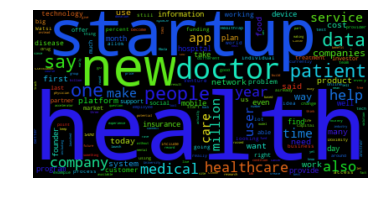

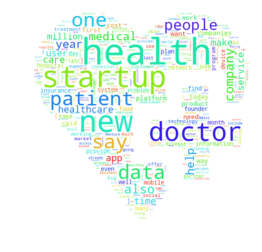

In [33]:
#Health
analysis = analyzeCategory("Health")
showWordCloud(analysis['stringOfContent'])
alice_mask = cv2.imread('Health.png')
wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
row = ["Health",analysis['documents_df']['ContentLength'].mean()]
# generate word cloud
wc.generate(analysis['stringOfContent'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()


'health', 'new', 'startup' are the hot words, indicating that over the years, startups focusing on health innovation is gaining tractions. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="44"></a>
### 4.4 Article Length of Categories
To find out the average article length of each categories, we visualized the histogram of content length across all categories. 

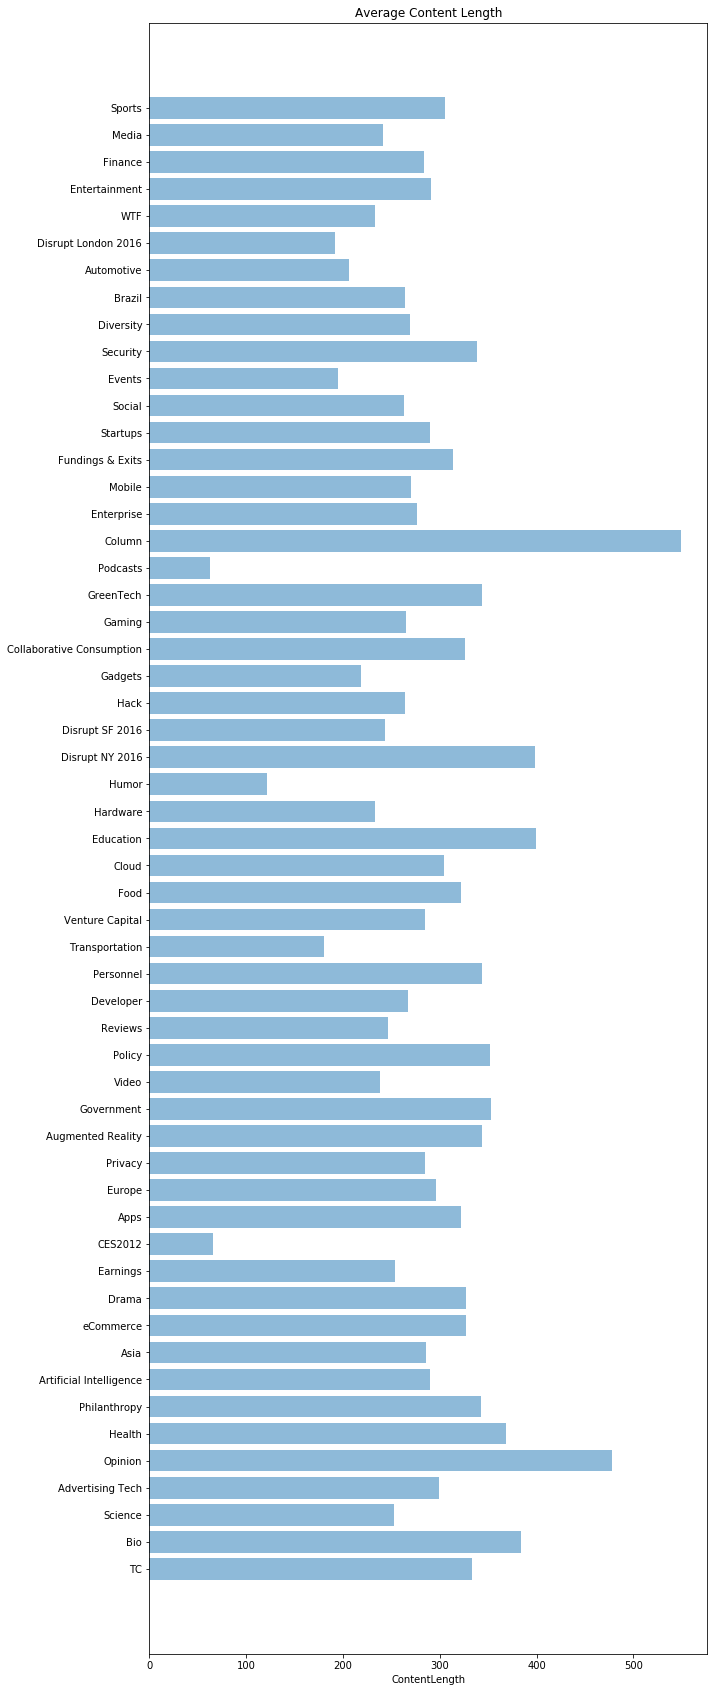

In [36]:
#Histogram to show average content length.
df_meanCategoryWordCount = pd.DataFrame(meanCategoryWordCount,columns=['Category','ContentLength'])

#Histogram for Content Length.
objects = df_meanCategoryWordCount['Category']
y_pos = np.arange(len(objects))
performance = df_meanCategoryWordCount['ContentLength']
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(111)
plt.barh(y_pos,performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ContentLength')
plt.title('Average Content Length')

plt.show()

Not surprisingly, 'column' articles are the longest. 'Podcast' is the shortest since it might only contain a short intro and a link to the actual podcast! 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="45"></a>
### 4.5 Author Contributions
It's also valuable to find out which author is the biggest contributor. We created a histogram of all authors and their number of articles. 

There are 3772 articles by Sarah Perez.
There are 3232 articles by Anthony Ha.
There are 3026 articles by Ingrid Lunden.
There are 2895 articles by Darrell Etherington.
There are 2555 articles by Natasha Lomas.
There are 2278 articles by Jordan Crook.
There are 2245 articles by Josh Constine.
There are 1885 articles by Steve O'Hear.
There are 1676 articles by Rip Empson.
There are 1232 articles by Romain Dillet.


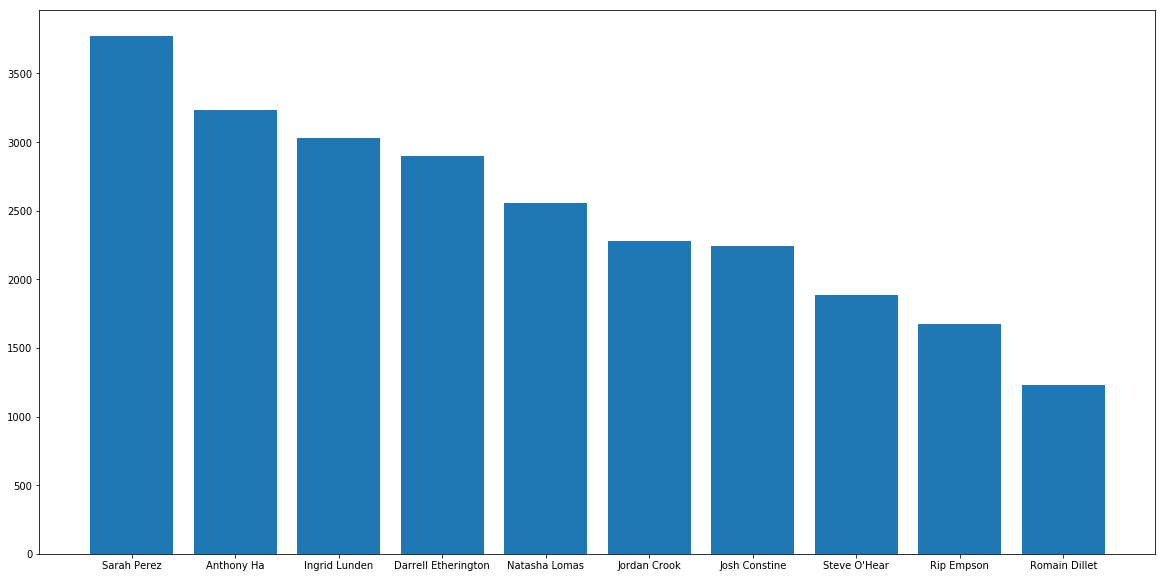

In [37]:
# Aggregating articles by author and plotting contributions by each authors.
df_Category = df.groupby(by='authors')
df_Category = sorted(df_Category,  # iterates pairs of (key, corresponding subDataFrame)
                key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
                reverse=True)
authors = []

for val,grp in df_Category[:10]:
    print('There are',len(grp),'articles by',val +'.')
    authors.append([val,len(grp)])

df_authors = pd.DataFrame(authors,columns=['Author','articles'])

height = df_authors['articles']
bars = df_authors['Author']
y_pos = np.arange(len(bars))
 
# Create bars
plt.figure(figsize=(20, 10))
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

Drilling down to our top contributors: 'Sarah Perez', 'Anthony Ha' and 'Ingrid Lunden'. Let's find out what category each of them wrote the most. 

In [70]:
#Lists all articles by category authored Sarah Perez 
dfAuthorCategories = df[df['authors'] == 'Sarah Perez'].groupby(by='category')
dfAuthorCategories = sorted(dfAuthorCategories,  # iterates pairs of (key, corresponding subDataFrame)
                key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
                reverse=True)

print('Sarah Perez has authored:')
for val,grp in dfAuthorCategories:
    print('  ',len(grp),'article/s in',val +'.')

Sarah Perez has authored:
   2048 article/s in Apps.
   385 article/s in Fundings & Exits.
   290 article/s in Social.
   255 article/s in Startups.
   218 article/s in eCommerce.
   179 article/s in Mobile.
   105 article/s in Gadgets.
   96 article/s in Enterprise.
   61 article/s in Advertising Tech.
   19 article/s in Europe.
   17 article/s in Opinion.
   15 article/s in Education.
   11 article/s in Gaming.
   9 article/s in Media.
   8 article/s in Finance.
   7 article/s in Developer.
   4 article/s in Disrupt NY 2016.
   4 article/s in GreenTech.
   4 article/s in Health.
   3 article/s in Collaborative Consumption.
   3 article/s in Hack.
   3 article/s in Security.
   2 article/s in Artificial Intelligence.
   2 article/s in Entertainment.
   2 article/s in Events.
   2 article/s in Government.
   1 article/s in Disrupt SF 2016.


<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="46"></a>
### 4.6 Topics Trend Over Time
Being able to know the trend of topics over time sometime is very valuable information. It helps the editors of the website or media to better manage how much coverage each category should have. To do that, we created a series of category percentage Donut Plot to show the trend over the years of our dataset. 

In [41]:
#Converting date to dateTimeFormat
df['new_date'] = pd.to_datetime(df['date'])

Year  2010 :


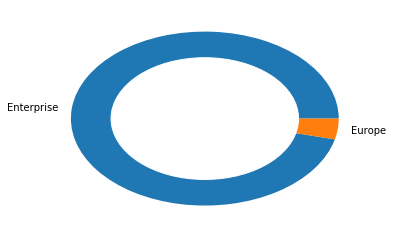

Year  2011 :


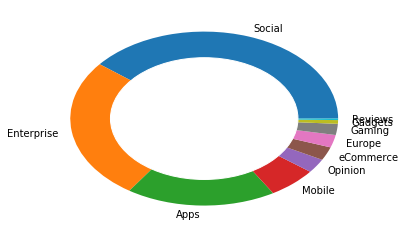

Year  2012 :


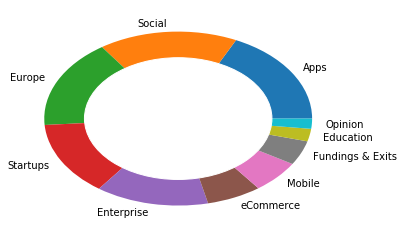

Year  2013 :


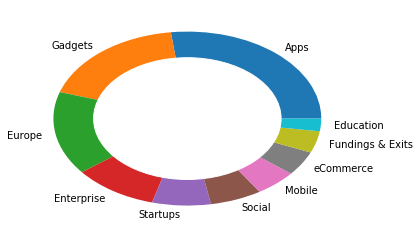

Year  2014 :


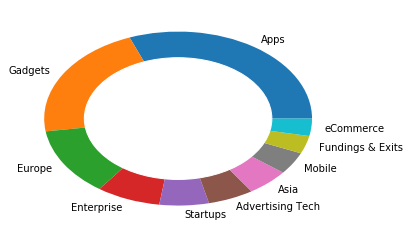

Year  2015 :


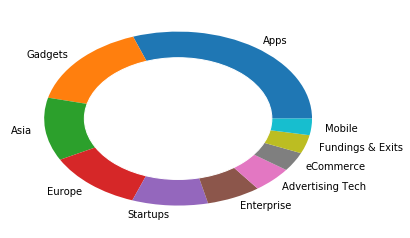

Year  2016 :


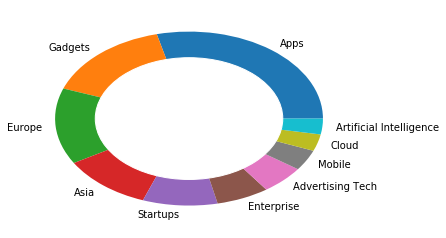

In [42]:
#Plot all categories by year using Donut Plot.
df_dateOfArticles = df.groupby(df.new_date.dt.year)

for val,grp in df_dateOfArticles:
    print('Year ',val,':')
    yearlyArticles = df[df.new_date.dt.year == val]
    yearlyArticles = yearlyArticles.groupby(by='category')
    yearlyArticles = sorted(yearlyArticles,  # iterates pairs of (key, corresponding subDataFrame)
                key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
                reverse=True)
    yearlyCategories = []
    for val,grp in yearlyArticles[:10]:
        #print('There are',len(grp),'articles about',val +'.')
        yearlyCategories.append([val,len(grp)])
    df_yearlyCategories = pd.DataFrame(yearlyCategories,columns= ['Category','Count'])
    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    # Give color names
    plt.pie(df_yearlyCategories['Count'], labels=df_yearlyCategories['Category'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

From the graphs we can see that 'social' is most popular around 2012 and shrinked down every year, while 'apps' is a rising star from 2012 and keeping the momentum till 2016. 

<div style="text-align: right">[BACK TO TOP](#0)</div>

<a name="5"></a>
## 5. Reference
[1] Sebastian Raschka, "Python Machine Learning"

<div style="text-align: right">[BACK TO TOP](#0)</div>